##  1D linear regression using PyTorch and scikit-learn


## Problem overview

We want to solve for the slope $m$ and $y$-intercept $b$ in the equation 
<br>
<br>
$$
y = m * X + b~,~~~~~~~~~~~~~~~~~~~~~~(1)
$$
<br>

where $X$ is the independent variable and $y$ is a series of samples having noise. 
 
<br>
<br>
In the cells below, we will specify "ground truth" values of $m$ and $b$, generate noise-contaminated samples $y$ over a range of $X$, demonstrate how to recover $m$ and $b$ from the noisy data and compare them to the ground truth values. 
<br>
<br>

We will find $m$ and $b$ using three different methods:
<br>
1. Using the scikit-learn linear regression estimator
<br>
This is by far the easiest way to go. We just use it to get values for $m$ and $b$ to compare later to the PyTorch values. 
<br>
<br>
2. Fitting the data using gradient descent in PyTorch
<br>
Here we manually use gradient descent to update the estimates of $m$ and $b$. 
<br>
<br>
<br>
3. Using a PyTorch Neural Network
<br>
The final weight and bias values of a trained linear NN model are simply the $m$ and $b$ values we want to determine.
<br>
<br>

### Comments

> In reality, the best way to solve a relatively simple linear regression problem like the one shown here would be to $NOT$ use PyTorch - one would use scikit-learn or some other method. The purpose of this notebook is to just illustrate a few different ways to use PyTorch and become familiar with it. 



### Make required imports

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Generate and show the ideal model values and the noisy "data" values

### The "n" subscript denotes Numpy arrays, in contrast with torch tensors

Ground truth values of m and b are 7.0 and -12.0, respectively.


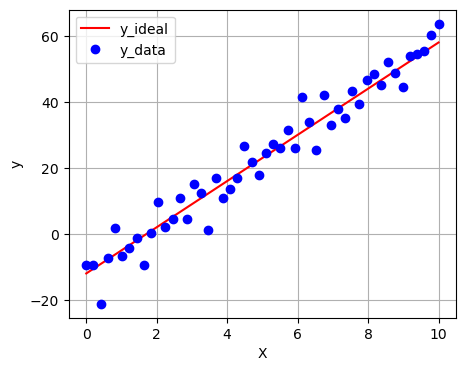

In [5]:
# Here is our independent variable range - a Numpy array:
X_n = np.linspace(0.0, 10.0, 50)

# Specify the ground truth values of m and b:
m_true, b_true = 7.0, -12.0

# Here is our ideal function:
y_ideal_n = m_true * X + b_true

# Create data by adding discernible noise to the ideal data
y_data_n = y_ideal_n + 5.0 * np.random.randn(X_n.shape[0])

print(f'Ground truth values of m and b are {m_true} and {b_true}, respectively.')
plt.figure(figsize=(6,4))
plt.plot(X, y_ideal_n, 'r', label='y_ideal')
plt.plot(X, y_data_n, 'bo', label='y_data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


### 1. Use a scikit-learn linear regressor to solve for m and b using the noisy data

In [6]:
# Instantiate the regressor
sk_linear = LinearRegression()

# Fit the data after reshaping both X and y to be N x 1
sk_linear.fit(X_n.reshape(-1, 1), y_data_n.reshape(-1, 1))

# Now predict with the fit
y_pred_n = sk_linear.predict(X_n.reshape(-1, 1))

# Show the results to compare with the ideal values
print("Predicted results:")
print(f"  The estimated slope m is {np.round(sk_linear.coef_[0].item(), 3)}.")
print(f"  The estimated intercept b is {np.round(sk_linear.intercept_.item(), 3)}.")
print()
print("Ideal values:")
print(f"  The ground truth slope m is {m_true}.")
print(f"  The ground truth intercept b is {b_true}.")

Predicted results:
  The estimated slope m is 7.187.
  The estimated intercept b is -12.782.

Ideal values:
  The ground truth slope m is 7.0.
  The ground truth intercept b is -12.0.


### 2. Use PyTorch to manually implement gradient descent to solve for m and b using the noisy data

Predicted results:
The final slope m is 7.187.
The final intercept b is -12.782.

Ideal values:
  The ground truth slope m is 7.0.
  The ground truth intercept b is -12.0.


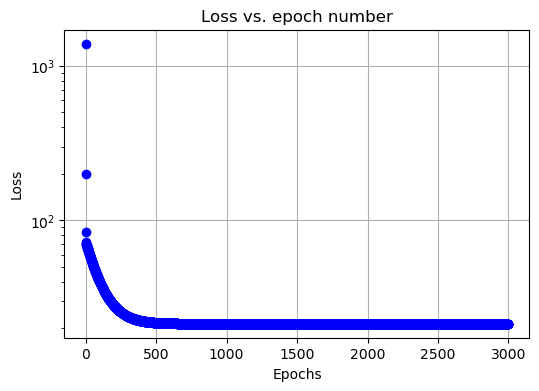

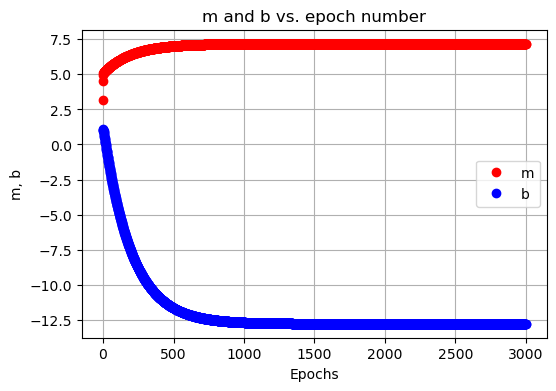

In [7]:
# We use the same data as was used above, 
#but we must first convert the np arrays to torch tensors
X = torch.from_numpy(X_n.astype(np.float32))
y_data = torch.from_numpy(y_data_n.astype(np.float32))

# Here is our prediction:
def pred(x, m):
    return w * x + b

# Compute the MSE:
def getMSE(y_pred, y_data):
    return torch.mean((y_pred - y_data) ** 2)

# Make random initial guesses for w, b
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Empty lists to hold loss and parameter histories as training evolves
loss_history = []
w_history = []
b_history = []


# The appropriate step size is crucial. It is synonomous with learning rate. 
step_size = 0.01  # 0.01 works well for the initial m and b used here
epochs = 3000

for _ in range(epochs):
    # Make a prediction
    y_pred = pred(X, b)

    # Calculate the loss between the original and predicted data points
    loss = getMSE(y_pred, y_data)

    # Log the loss as training evolves
    loss_history.append(loss.item())
    
    # Calculate the gradients using backprop
    loss.backward()

    with torch.no_grad():  # Not sure we need to turn off grad here. Works otherwise too.
        # Update the parameters using gradient descent
        w.data -= step_size * w.grad.data
        b.data -= step_size * b.grad.data

        w_history.append(w.item())
        b_history.append(b.item())

        # Zero the gradients after every epoch
        w.grad.data.zero_()
        b.grad.data.zero_()

# Show the results to compare with the ideal values
print("Predicted results:")
print(f"The final slope m is {np.round(w.item(), 3)}.")
print(f"The final intercept b is {np.round(b.item(), 3)}.")
print()
print("Ideal values:")
print(f"  The ground truth slope m is {m_true}.")
print(f"  The ground truth intercept b is {b_true}.")
    
# Show the loss history
plt.figure(figsize=(6,4))
plt.semilogy(loss_history, 'bo')
plt.grid()
plt.title("Loss vs. epoch number")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# And see how the fitting parameters converge
plt.figure(figsize=(6,4))
plt.plot(w_history, 'ro', label='m')
plt.plot(b_history, 'bo', label='b')
plt.title("m and b vs. epoch number")
plt.xlabel('Epochs')
plt.ylabel('m, b')
plt.legend()
plt.grid()
plt.show()

### 3. Use the built-in PyTorch neural network linear model to solve for m and b using the noisy data. 

### The final NN model weight and bias values [w, b] are the same as m and b, respectively.

Predicted results:
  The final slope is 7.187.
  The final y-intercept is -12.782.

Ideal values:
  The ground truth slope m is 7.0.
  The ground truth intercept b is -12.0.


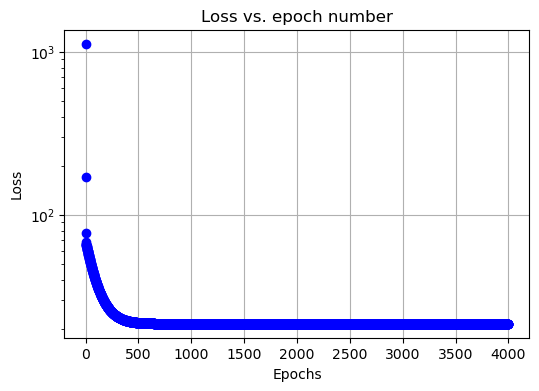

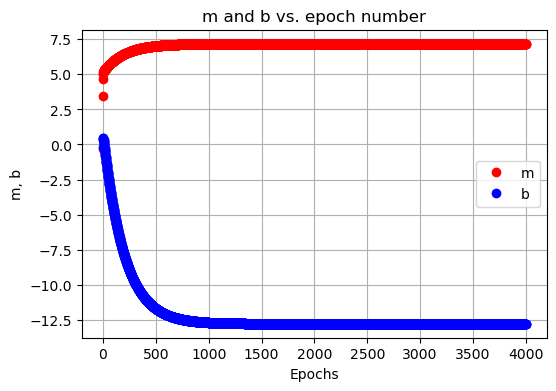

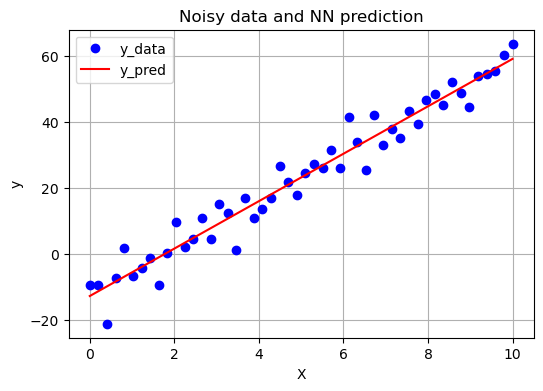

In [68]:
# We have only one input and one output
n_in, n_out = 1, 1

# Specify learning rate and epoch number
learning_rate = 0.01
epochs = 4000

# Instantiate the linear NN model
model = nn.Linear(n_in, n_out)

# Use MSE for loss
MSE = nn.MSELoss()

# Specify the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Need to change the shape of these to be N x 1
X = X.view(-1, 1)
y_data = y_data.view(-1, 1)

# Empty lists to hold loss and parameter histories as training evolves
loss_history = []
w_history = []
b_history = []

# Train the model here    
for _ in range(epochs):
    # Make a prediction
    y_pred = model(X)
    
    # Get the loss
    loss = MSE(y_pred, y_data)
    
    # Log the loss as training evolves
    loss_history.append(loss.item())
    
    # Log the convergence of the model parameters, w and b:
    for name, param in model.named_parameters():
        if name == "weight":
            w_history.append(np.round(param.data.item(), 3))
        if name == "bias":
            b_history.append(np.round(param.data.item(), 3))
    
    
    # Calculate the gradients using backprop
    loss.backward()
    
    # Make an update
    optimizer.step()
    
    # Zero the gradients after each step
    optimizer.zero_grad()
    
# Here are the final model predictions after training is complete:
final_pred = model(X).detach()

# Print the final weight and bias values - the slope and intercept, respectively
print("Predicted results:")
print(f"  The final slope is {w_history[-1]}.")
print(f"  The final y-intercept is {b_history[-1]}.")
print()
print("Ideal values:")
print(f"  The ground truth slope m is {m_true}.")
print(f"  The ground truth intercept b is {b_true}.")



# Show the loss history
plt.figure(figsize=(6,4))
plt.semilogy(loss_history, 'bo')
plt.grid()
plt.title("Loss vs. epoch number")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# And see how the fitting parameters converge
plt.figure(figsize=(6,4))
plt.plot(w_history, 'ro', label='m')
plt.plot(b_history, 'bo', label='b')
plt.title("m and b vs. epoch number")
plt.xlabel('Epochs')
plt.ylabel('m, b')
plt.legend()
plt.grid()
plt.show()

# Plot the final NN fit result along with the original data set
plt.figure(figsize=(6,4))
plt.plot(X_n, y_data_n, 'bo', label='y_data')
plt.plot(X_n, final_pred, 'r-', label='y_pred')
plt.title("Noisy data and NN prediction")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()